<a href="https://colab.research.google.com/github/phamducdai092/ML_LAB/blob/main/Lab_4_21130304_PhamDucDai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks.

*   **Deadline: 23:59, 01/04/2024**



# Import libraries

In [ ]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Task 1.
Apply **LogisticRegression** to iris dataset to classify species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'.



```
from sklearn import datasets
data1 = datasets.load_iris()
```




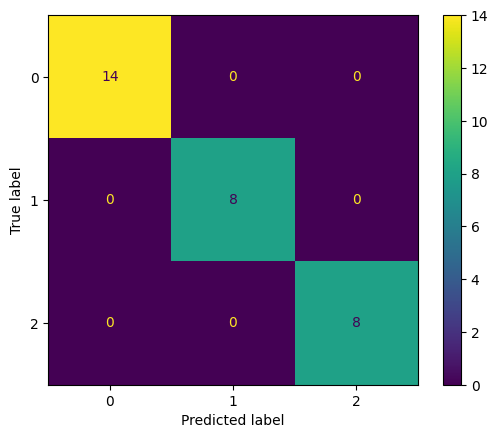

In [ ]:
# code
from sklearn import datasets
data1 = datasets.load_iris(as_frame = True);

x = data1.data;
y = data1.target;
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2);

regressor = LogisticRegression(random_state = 1, max_iter = 500);
regressor.fit(x_train, y_train);
y_pred = regressor.predict(x_test);


cm = metrics.confusion_matrix(y_test, y_pred);
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = regressor.classes_)
display.plot();



#Task 2.
Apply LogisticRegression to **FASHION** dataset (*fashion_train.csv* and *fashion_test.csv*) which aims at classifying 10 fashion categories. Dataset includes 784 pixels values of images (28x28). This pixel-value is an integer between 0 and 255. Each training and test example is assigned to one of the following labels:

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

In [ ]:
# code
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Data_ML/lab_4"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data_ML/lab_4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


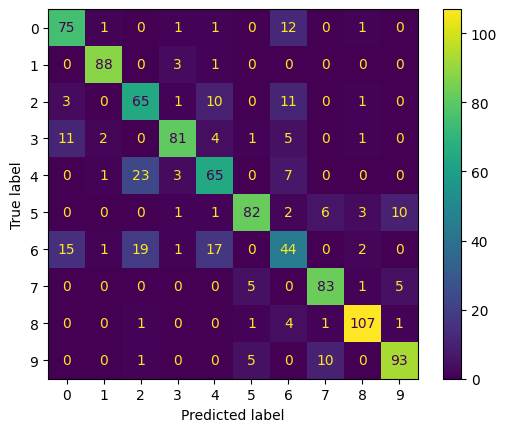

In [ ]:
fashion_train = pd.read_csv("fashion_train.csv")
fashion_test = pd.read_csv("fashion_test.csv")

X_train = fashion_train.drop(columns="y");
y_train = fashion_train[["y"]];
X_test = fashion_test.drop(columns="y");
y_test = fashion_test[["y"]];

regressor.fit(X_train, y_train);
y_pred = regressor.predict(X_test);

cm = metrics.confusion_matrix(y_test, y_pred);
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = regressor.classes_)
display.plot();

#Task 3.
Apply another classification algorithm named **kNN**, which is an instance classifcation model.
*  3.1. Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: **accuracy, precision, recall, f1 measure**) using **PrettyTable**.


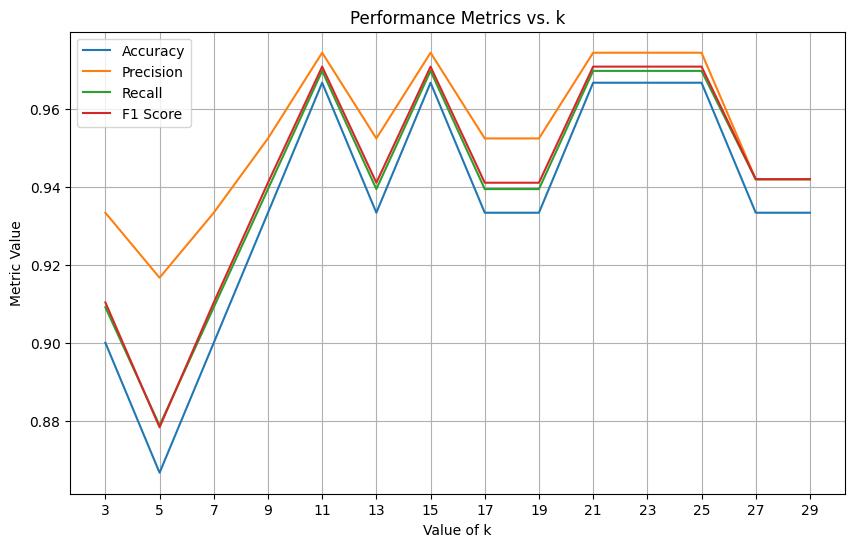

+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
|     kNN (best k)    | 0.9666666666666667 | 0.9743589743589745 | 0.9696969696969697 | 0.9707936507936509 |
| Logistic Regression | 0.9333333333333333 | 0.9523809523809524 | 0.9393939393939394 | 0.9410256410256409 |
+---------------------+--------------------+--------------------+--------------------+--------------------+


In [ ]:
from prettytable import PrettyTable

data1 = datasets.load_iris(as_frame=True)
x = data1.data
y = data1.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

knn_accuracies = []
knn_precisions = []
knn_recalls = []
knn_f1_scores = []
# kNN
k_values = list(range(3, 30, 2))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    knn_accuracies.append(accuracy)
    knn_precisions.append(precision)
    knn_recalls.append(recall)
    knn_f1_scores.append(f1)

best_k_index = np.argmax(knn_accuracies)
best_k = k_values[best_k_index]

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, label='Accuracy')
plt.plot(k_values, knn_precisions, label='Precision')
plt.plot(k_values, knn_recalls, label='Recall')
plt.plot(k_values, knn_f1_scores, label='F1 Score')
plt.xlabel('Value of k')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. k')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = metrics.accuracy_score(y_test, y_pred_logreg)
precision_logreg = metrics.precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = metrics.recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = metrics.f1_score(y_test, y_pred_logreg, average='macro')


table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["kNN (best k)", knn_accuracies[best_k_index], knn_precisions[best_k_index],
               knn_recalls[best_k_index], knn_f1_scores[best_k_index]])
table.add_row(["Logistic Regression", accuracy_logreg, precision_logreg, recall_logreg, f1_logreg])

print(table)


#Task 4.
Similar to Task 3, apply kNN algorithm to **FASHION** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.2.	Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.3.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


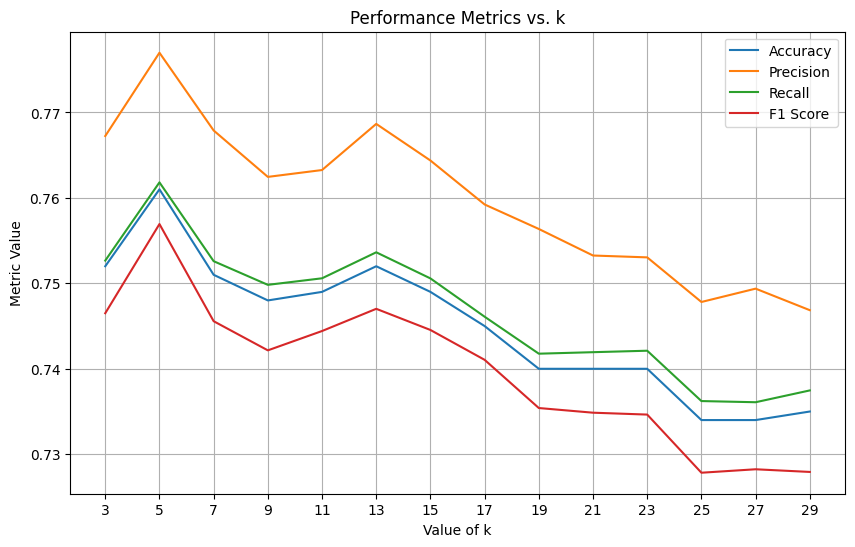

+---------------------+----------+--------------------+--------------------+--------------------+
|        Model        | Accuracy |     Precision      |       Recall       |      F1 Score      |
+---------------------+----------+--------------------+--------------------+--------------------+
|     kNN (best k)    |  0.761   | 0.7769873089533864 |  0.76181486566761  | 0.7569379032729887 |
| Logistic Regression |  0.783   | 0.7809442345560383 | 0.7814072147995884 | 0.7792284373987487 |
+---------------------+----------+--------------------+--------------------+--------------------+


In [ ]:
# code

from prettytable import PrettyTable

fashion_train = pd.read_csv("fashion_train.csv")
fashion_test = pd.read_csv("fashion_test.csv")

X_train = fashion_train.drop(columns="y")
y_train = fashion_train["y"]
X_test = fashion_test.drop(columns="y")
y_test = fashion_test["y"]

knn_accuracies = []
knn_precisions = []
knn_recalls = []
knn_f1_scores = []

k_values = list(range(3, 30, 2))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    knn_accuracies.append(accuracy)
    knn_precisions.append(precision)
    knn_recalls.append(recall)
    knn_f1_scores.append(f1)

best_k_index = np.argmax(knn_accuracies)
best_k = k_values[best_k_index]

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, label='Accuracy')
plt.plot(k_values, knn_precisions, label='Precision')
plt.plot(k_values, knn_recalls, label='Recall')
plt.plot(k_values, knn_f1_scores, label='F1 Score')
plt.xlabel('Value of k')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. k')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = metrics.accuracy_score(y_test, y_pred_logreg)
precision_logreg = metrics.precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = metrics.recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = metrics.f1_score(y_test, y_pred_logreg, average='macro')

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["kNN (best k)", knn_accuracies[best_k_index], knn_precisions[best_k_index],
               knn_recalls[best_k_index], knn_f1_scores[best_k_index]])
table.add_row(["Logistic Regression", accuracy_logreg, precision_logreg, recall_logreg, f1_logreg])

print(table)

#Task 5.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered **spam (1) or not (0)**, i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:
*  **48 continuous real [0,100] attributes** of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  **6 continuous real [0,100] attributes** of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  **1 continuous real [1,...] attribute** of type capital_run_length_average
= average length of uninterrupted sequences of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  **1 nominal {0,1} class attribute** of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
# code
spam_email = pd.read_csv("spambase.csv")
X = spam_email.drop(columns="class")
y = spam_email["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = metrics.accuracy_score(y_test, y_pred_logreg)
precision_logreg = metrics.precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = metrics.recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = metrics.f1_score(y_test, y_pred_logreg, average='macro')

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["Logistic Regression", accuracy_logreg, precision_logreg, recall_logreg, f1_logreg])

k_values = list(range(3, 30, 2))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    table.add_row(["kNN k = " + str(k), accuracy, precision, recall, f1])

print(table)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+---------------------+--------------------+--------------------+--------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------------+--------------------+--------------------+--------------------+--------------------+
| Logistic Regression | 0.9174809989142236 | 0.9164346973780937 | 0.9130139982502188 | 0.9146056997852821 |
|      kNN k = 3      | 0.7969598262757872 | 0.791679819283051  | 0.7874380285797609 | 0.7892641921530961 |
|      kNN k = 5      | 0.7806731813246471 | 0.7759507684292785 | 0.7677529892096822 | 0.770816497486942  |
|      kNN k = 7      | 0.756786102062975  | 0.7509208937198067 | 0.7423592884222805 | 0.7453716046091413 |
|      kNN k = 9      | 0.754614549402823  | 0.748786909721872  |  0.73973461650627  | 0.7428493066743098 |
|      kNN k = 11     | 0.754614549402823  | 0.7482692808624041 | 0.7408938466025081 | 0.7435867744160836 |
|      kNN k = 13     | 0.75

In [ ]:
from prettytable import PrettyTable

# These 3 are the columns of the tables
t = PrettyTable(['Subject Code', 'Subject', 'Marks'])

# To insert rows:
t.add_row(['K01', 'Maths', 95])
t.add_row(['K04', 'Physics', 89])
t.add_row(['K03', 'Chemistry', 92])
t.add_row(['K08', 'English', 91])
t.add_row(['K29', 'Computer Science', 99])
t.add_row(['K06', 'Social Science', 86])

print(t)

+--------------+------------------+-------+
| Subject Code |     Subject      | Marks |
+--------------+------------------+-------+
|     K01      |      Maths       |   95  |
|     K04      |     Physics      |   89  |
|     K03      |    Chemistry     |   92  |
|     K08      |     English      |   91  |
|     K29      | Computer Science |   99  |
|     K06      |  Social Science  |   86  |
+--------------+------------------+-------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.